Elapsed Time for Test Case: 0.0001201629638671875 seconds
Elapsed Time for Test Case: 0.00011277198791503906 seconds


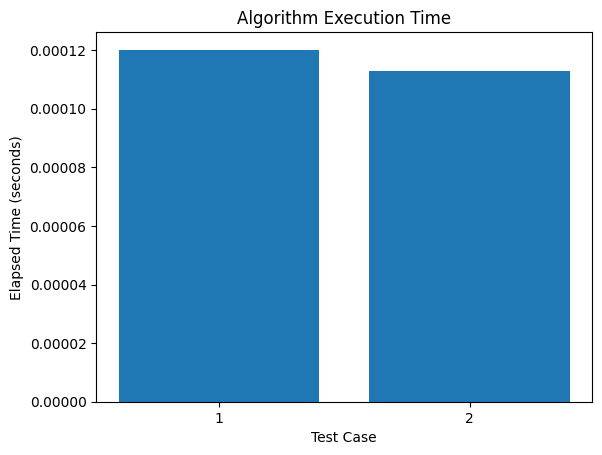

In [19]:
import time
import matplotlib.pyplot as plt

def bfs(CR, FR, s, t):
    queue = [s]
    paths = {s: []}
    if s == t:
        return paths[s]
    while queue:
        u = queue.pop(0)
        for v in range(len(CR)):
            if (CR[u][v] - FR[u][v] > 0) and v not in paths:
                paths[v] = paths[u] + [(u, v)]
                if v == t:
                    return paths[v]
                queue.append(v)
    return None

def edmonds_karp_algorithm(entrances, exits, capacity):
    max_capacity = 9999
    n = len(capacity)
    s = n
    t = n + 1

    residual_graph = [[capacity[u][v] for v in range(n)] for u in range(n)]
    for row in range(n):
        residual_graph[row].append(0)
        residual_graph[row].append(max_capacity if row in exits else 0)

    n += 2
    residual_graph.append([(max_capacity if x in entrances else 0) for x in range(n)])
    residual_graph.append([0] * n)

    FR = [[0] * n for _ in range(n)]

    paths = bfs(residual_graph, FR, s, t)
    while paths is not None:
        flow = min(residual_graph[u][v] - FR[u][v] for u, v in paths)
        for u, v in paths:
            FR[u][v] += flow
            FR[v][u] -= flow

            if (v, u) in paths:
                residual_graph[v][u] += flow
            else:
                residual_graph[u][v] -= flow

            if residual_graph[u][v] == 0:
                residual_graph[v][u] = 0

        paths = bfs(residual_graph, FR, s, t)

    max_flow = sum(FR[s][i] for i in range(n))

    return max_flow, None  # Burada hata olmadığını belirtmek için None kullanılıyor

def run_tests(test_cases):
    results = []

    for test_case in test_cases:
        start_time = time.time()
        try:
            result, error_message = edmonds_karp_algorithm(test_case['entrances'], test_case['exits'], test_case['capacity'])
        except Exception as e:
            result, error_message = None, str(e)
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Elapsed Time for Test Case: {elapsed_time} seconds")

        success = result is not None
        results.append({'input': test_case, 'output': result, 'elapsed_time': elapsed_time, 'success': success, 'error_message': error_message})

    return results

test_cases = [
    {
        'entrances': [0],
        'exits': [3],
        'capacity': [
            [0, 10, 5, 15, 0],
            [0, 0, 0, 5, 10],
            [0, 0, 0, 15, 5],
            [0, 0, 0, 0, 10],
            [0, 0, 0, 0, 0],
        ]
    },
    {
        'entrances': [0],
        'exits': [5],
        'capacity': [
            [0, 10, 5, 15, 0, 0],
            [0, 0, 4, 0, 9, 0],
            [0, 0, 0, 8, 0, 0],
            [0, 0, 0, 0, 0, 30],
            [0, 0, 0, 0, 0, 20],
            [0, 0, 0, 0, 0, 0]
        ]
    }
]

results = run_tests(test_cases)

# Time graph
test_cases_labels = [str(i+1) for i in range(len(test_cases))]
times = [result['elapsed_time'] for result in results]

plt.bar(test_cases_labels, times)
plt.xlabel('Test Case')
plt.ylabel('Elapsed Time (seconds)')
plt.title('Algorithm Execution Time')
plt.show()

# Print errors
# Kod içinde success alanı True ise yani algoritmanın başarıyla çalıştığı durumlarda, hata mesajı bastırılmayacak. Ancak, eğer bir test durumu başarısız olursa ve success alanı False olursa, error_message içinde ilgili hatanın açıklamasını görebilirsiniz
for result in results:
    if not result['success']:
        print(f"Error in Test Case {test_cases.index(result['input']) + 1}: {result['error_message']}")



Flow: 25


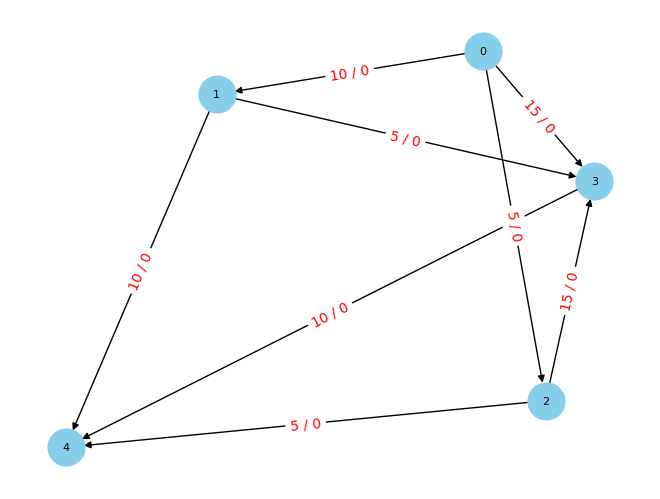

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

def bfs(CR, FR, s, t):
    #CR: Kapasite matrisi
    #FR: Akış matrisi
    #s: Kaynak düğüm
    #t: Hedef düğüm

    queue = [s]#baslangic dugumu s ile başladi
    paths = {s: []}#path sozlugu olusturuldu ve baglangic dugumu bos yol atandi. bu sozluk her dugumde en kisa yolu tutacak
    if s == t:
        return paths[s] #kaynak ve hedef dugumleri ayni ise fonksiyon bos yol donderir
    while queue:#queuemuz bosalana kadar while dongusu donmeye devam eder
        u = queue.pop(0) #u dugumleri queuedan cikarilan degerleri isaret eder

        for v in range(len(CR)):# v = kapasite matrisi dugumleri
            if (CR[u][v] - FR[u][v] > 0) and v not in paths:#v dugumu daha once paths sozlugunde bulunmamissa yani bu dugume henuz bir yol atanmamissa bu sart saglanir.
                paths[v] = paths[u] + [(u, v)]#yeni yol ekle. paths[u]varolan yol, bu yola u,v eklenir. yeni yol paths[v]
                if v == t:#hedef dugum kontrolu
                    return paths[v]
                queue.append(v)#v dugumu daha once paths sozlugunde degılse ekle
    return None

def edmonds_karp_algorithm(entrances, exits, capacity):
    #bu fonksiyon kapasite matris giris dugumleri listesi ve cikis dugumleri list alir
    max_capacity = 9999#max kapasite sabiti
    n = len(capacity)# n= kapasite amtrisi boyutu
    s = n
    t = n + 1

   # bu artikli graf kapasite matrisinde her satira iki sutun ekler
    #1. cikis kapasitesi
    #2. giris kapasitesi
    residual_graph = [[capacity[u][v] for v in range(n)] for u in range(n)]
    for row in range(n):
        residual_graph[row].append(0)
        residual_graph[row].append(max_capacity if row in exits else 0)

    n += 2
    residual_graph.append([(max_capacity if x in entrances else 0) for x in range(n)])
    residual_graph.append([0] * n)

    FR = [[0] * n for i in range(n)]#tum degerleri 0 olan bir akis matrisi olusturulur


    paths = bfs(residual_graph, FR, s, t)#bfs algoritmasi ile artan yollar bulunur. her bir yol dugum cifti olarak ifade edilir
    while paths is not None:#artan yollarin tamami kullanildikca dongu devam eder
        flow = min(residual_graph[u][v] - FR[u][v] for u, v in paths)#bulunan yollarda min kapasiteye sahip baglantinin akis miktari hesaplama
        for u, v in paths:#bulunan her dugum cifti icin u.v girilir
            FR[u][v] += flow #baglantidaki akis miktari arttirilir
            FR[v][u] -= flow #yolun ters yonu icin baglantiya karsi cikis azaltiliyor

            if (v, u) in paths:#eger ters yonlu baglanti ise bu yonde kapasite arttirilir
                residual_graph[v][u] += flow
            else:
                residual_graph[u][v] -= flow

            if residual_graph[u][v] == 0:#eger baglantinin kapasitesi bittiyse ters yon kapasiteyi sifirla
                residual_graph[v][u] = 0

        paths = bfs(residual_graph, FR, s, t)#guncel artan yol bilgisi


    max_flow = sum(FR[s][i] for i in range(n))#max akis butun akislara giden yollarin toplanir

    return max_flow#hesaplanan max deger yazdirilir

#agdaki her bir kenarin kapasitesi
#bu matrisdeki her bir deger agdaki belirli bir kenarin tasiyabiilecegi max akis miktari
path = [
    [0, 10, 5, 15, 0],
    [0, 0, 0, 5, 10],
    [0, 0, 0, 15, 5],
    [0, 0, 0, 0, 10],
    [0, 0, 0, 0, 0],
]

source = [0]
sink = [3]

max_flow = edmonds_karp_algorithm(source, sink, path)

print("Flow:",max_flow)

def draw_graph(residual_graph, flow, capacity):
    G = nx.DiGraph()

    for u in range(len(residual_graph)):
        for v in range(len(residual_graph[u])):
            if residual_graph[u][v] > 0:
                G.add_edge(u, v, capacity=residual_graph[u][v], flow=flow[u][v])

    pos = nx.spring_layout(G)
    edge_labels = {(i, j): f"{residual_graph[i][j]} / {flow[i][j]}" for i, j in G.edges()}

    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.show()

# draw_graph fonksiyonunu çağırma işlemini max_flow değerini elde ettikten sonra yapalım
residual_graph = [[path[u][v] for v in range(len(path))] for u in range(len(path))]
FR = [[0] * (len(path) + 2) for i in range(len(path) + 2)]
draw_graph(residual_graph, FR, path)